In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import albumentations as A
from PIL import Image
import pandas as pd
import numpy as np
from training import setup_datasets
from inference import predict, evalontest
from models import Resi2

### Resi2 6points prediction:

In [2]:
model_name = "./models/experiment036_Resi2_6points_best_weights.pt"
num_points = 6
model = Resi2({"num_points" : num_points})
device = "cpu" if not torch.cuda.is_available() else "cuda:0"
model.load_state_dict(torch.load(model_name, map_location=device))
model = model.to(device)
train_ts, val_ts = setup_datasets(num_points, transform_train=False)
my_dataset = val_ts
test_dl = torch.utils.data.DataLoader(my_dataset, batch_size=64, shuffle=False)
xs, ys, preds = predict(model, test_dl)

c:\Users\magda\.conda\envs\tmj_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\magda\.conda\envs\tmj_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\magda\.conda\envs\tmj_env\Lib\site-packages\pydantic\main.py:176: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  self.__pydantic_validator__.validate_python(data, self_instance=self)


train dataset size: 1344
validation dataset size: 76
proportion of datasets: 0.946 : 0.054
---------------------


In [3]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ys.reshape((-1, 4)), preds.reshape((-1, 4)))

0.006690339

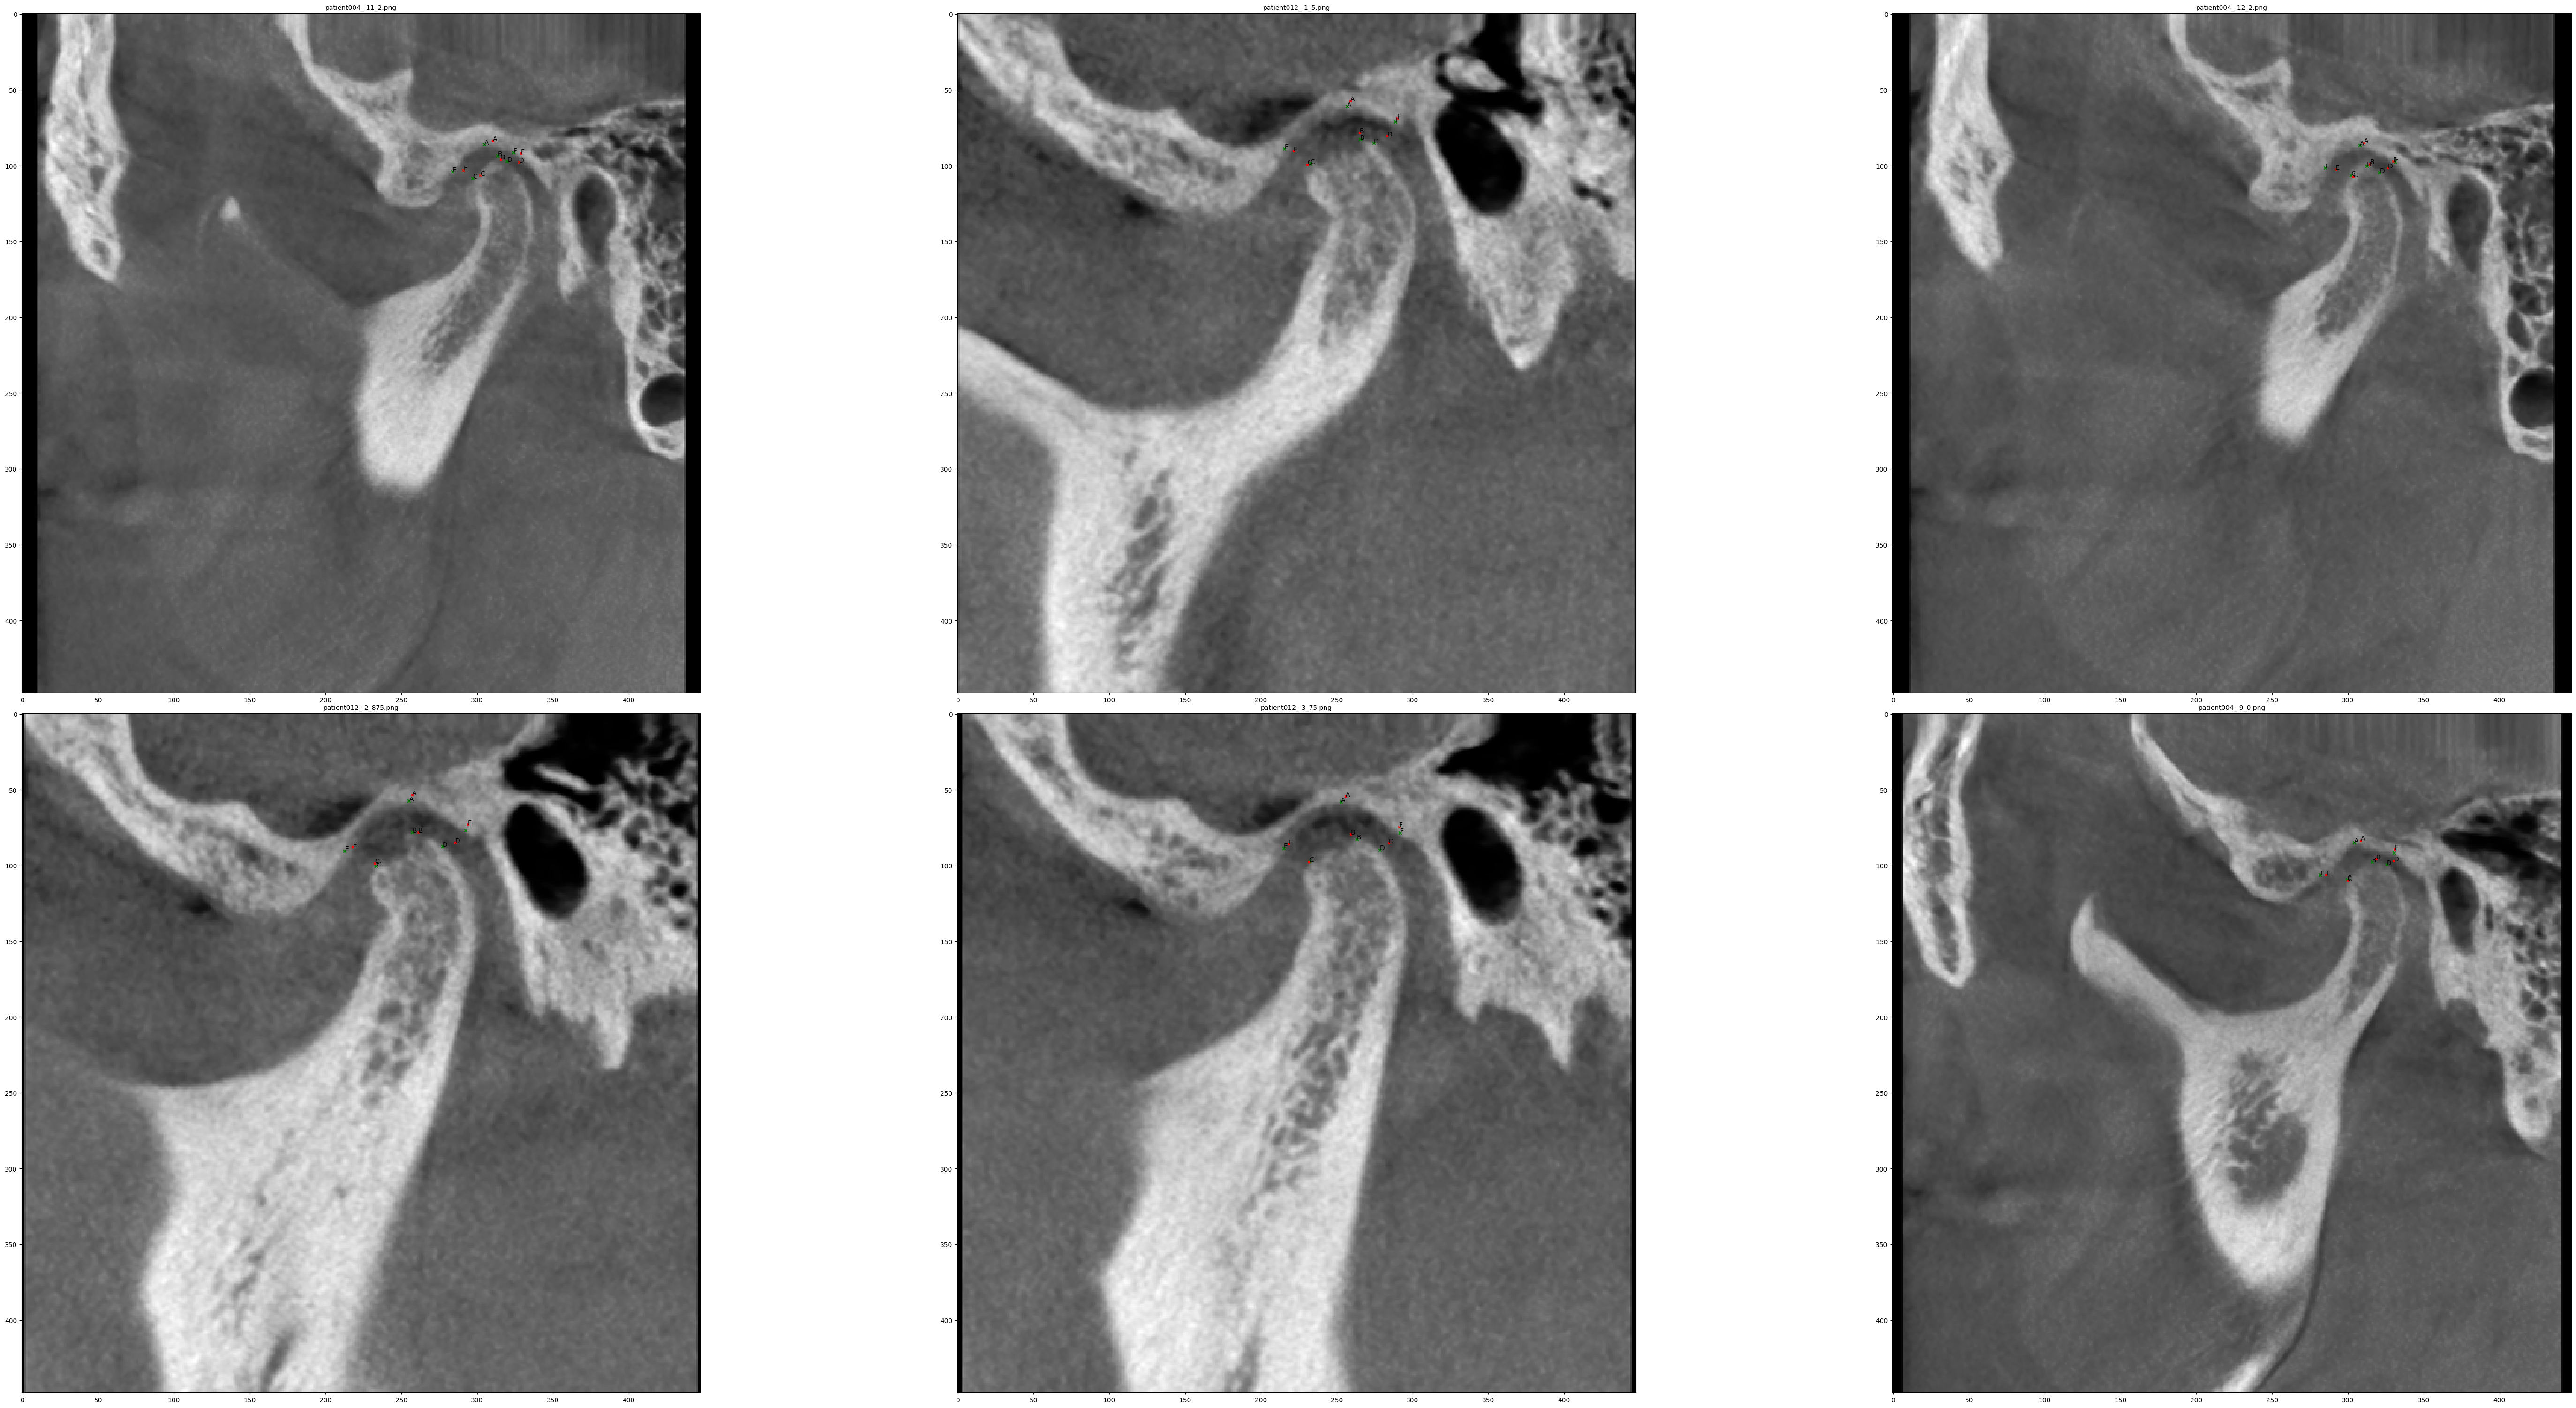

In [22]:
import matplotlib.pyplot as plt
import random
from PIL import Image

random.seed(123)
show_range = [6, 34, 11, 45, 52, 27]
fig, axs = plt.subplots(2, 3, figsize=(60, 30))  # Adjusted for direct figsize setting
fig.tight_layout()



# Show images and points
for i in range(2):
    for j in range(3):
        index = show_range[i*3+j]
        img_path = "../dicom_sagittal_2dimages/" + my_dataset.images[index]
        img = Image.open(img_path).convert('RGB')
        img = img.resize((448, 448))
        
        axs[i, j].set_title(my_dataset.images[index], fontsize=10)
        axs[i, j].imshow(img)
        
        # Ground truth points, make them bigger than the predicted points
        axs[i, j].scatter(ys[index, :, 0] * 448, ys[index, :, 1] * 448, c='g', marker='x', s=10)
        annotate_keys = ["A", "B", "C", "D", "E", "F"]
        for k in range(ys.shape[1]):
            axs[i, j].annotate(annotate_keys[k], (ys[index, k, 0] * 448, ys[index, k, 1] * 448), fontsize=10)
            
        # Predicted points
        axs[i, j].scatter(preds[index, :, 0] * 448, preds[index, :, 1] * 448, c='r', marker='x', s=10)
        for k in range(preds.shape[1]):
            axs[i, j].annotate(annotate_keys[k], (preds[index, k, 0] * 448, preds[index, k, 1] * 448), fontsize=10)

plt.show()  # Display the figure

In [21]:
fig.savefig('predictions_6points_1.png', transparent=True, dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor(), edgecolor='none')

### Consecutive predictions and their deviation (Resi2 6points)

In [14]:
from sklearn.metrics import mean_absolute_error
model_name = "./models/experiment036_Resi2_6points_best_weights.pt"
num_points = 6
model = Resi2({"num_points" : num_points})
device = "cpu" if not torch.cuda.is_available() else "cuda:0"
model.load_state_dict(torch.load(model_name, map_location=device))
model = model.to(device)
train_ts, val_ts = setup_datasets(num_points, transform_train=False)
my_dataset = val_ts
test_dl = torch.utils.data.DataLoader(my_dataset, batch_size=64, shuffle=False)
xs, ys, preds = predict(model, test_dl)
mae = mean_absolute_error(ys.reshape((-1, 4)), preds.reshape((-1, 4)))
print("mean absolute error validation dataset:", mae)

c:\Users\magda\.conda\envs\tmj_env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\magda\.conda\envs\tmj_env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\magda\.conda\envs\tmj_env\Lib\site-packages\pydantic\main.py:176: UserWarning: blur_limit and sigma_limit minimum value can not be both equal to 0. blur_limit minimum value changed to 3.
  self.__pydantic_validator__.validate_python(data, self_instance=self)


train dataset size: 1344
validation dataset size: 76
proportion of datasets: 0.946 : 0.054
---------------------
mean absolute error validation dataset: 0.006690339


In [16]:
import pandas as pd
df_losses = pd.read_csv("./models/experiment036_Resi2_6points_losses.txt", sep=";", header=0)
df_losses['valid_loss'].min()

0.0064395256340503